In [1]:
import numpy as np
from scipy.special import gamma
import plotly
import plotly.graph_objs as go
import plotly.io as pio
from IPython.display import Image
import random
import scipy as sci
from scipy import optimize

In [2]:
def pdf_chi_sq(x,k):
    if x <= 0:
        return(0)
    else:
        return(x**(k/2-1)*np.exp(-x/2)/(2**(k/2)*gamma(k/2)))

def inv_logit(odd):
    return(np.exp(odd)/(1+np.exp(odd)))

def ln_comb_2(x1,x2,a,b1,b2):
    return(a+b1*x1+b2*x2)

def f(x1,x2,a,b1,b2,k1,k2):
    return(inv_logit(ln_comb_2(pdf_chi_sq(x1,k1),pdf_chi_sq(x2,k2),a,b1,b2)))

In [3]:
obss = [(x,y,f(x,y,-2,5,2,3,3)) for x in range(1,10) for y in range(1,10)]
obss = [(obs[0],obs[1],obs[2]*max(np.random.normal(1,0.2),0)) for obs in obss] # introducimos aleatoriedad
obss = [obss[i] for i in random.sample(range(len(obss)), round(len(obss)*0.2))] # quitamos algunas observaciones

In [4]:
def surf_3d(fun = None, dominio = None,obss = None, titulo = "", interactiva = True):
    
    fig = go.Figure()
    if fun != None:
        x = np.linspace(10/dominio[0], dominio[0], dominio[0])
        y = np.linspace(10/dominio[1], dominio[1], dominio[1])

        X, Y = np.meshgrid(x, y)
        Z = []

        for i in range(0,len(X[:])):
            Z.append([])
            for j in range(0,len(Y[:])):
                Z[i].append(fun(X[i,j], Y[i,j]))  
        fig.add_trace(go.Surface(z=Z,x=X,y=Y, colorscale=[[0, "rgb(255,1,1)"],[0.2,"rgb(100,100,1)"],[1,"rgb(1,255,1)"]],opacity=0.6, showscale=False))
    if obss != None:
        fig.add_trace(go.Scatter3d(x=[obs[0] for obs in obss], y=[obs[1] for obs in obss], z=[obs[2] for obs in obss], mode='markers', marker=dict(
        color=[obs[2] for obs in obss], colorscale=[[0, "rgb(255,1,1)"],[0.2,"rgb(100,100,1)"],[1,"rgb(1,255,1)"]],
        size=5,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
        )))
    fig.update_layout(
                                     scene={"xaxis": {'title': "Precio",
                                                      "tickfont": {"size": 10}, 'type': "linear"},
                                            "yaxis": {"title": "Lead-Time",
                                                      "tickfont": {"size": 10}, "tickangle": 1},
                                            "zaxis": {
                                                'title': "Probabilidad de Compra",
                                                "tickfont": {"size": 10}},
                                            "camera": {"eye": {"x": 2, "y": 1, "z": 0.1}}, "aspectmode": "cube", }
        , autosize=False,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90), title = titulo)
    if interactiva == True:
        fig.show()
    else:
        display(Image(pio.to_image(fig, format='png')))

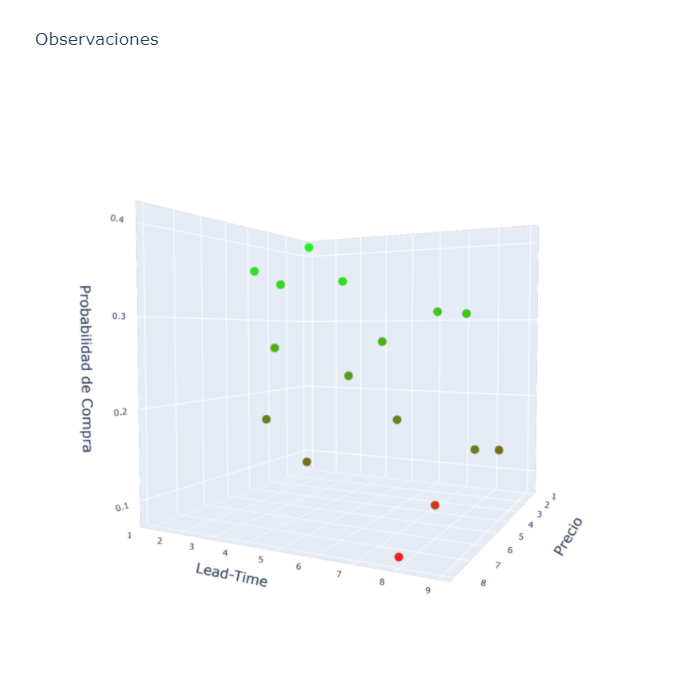

In [6]:
surf_3d(obss = obss, titulo = "Observaciones", interactiva = False)

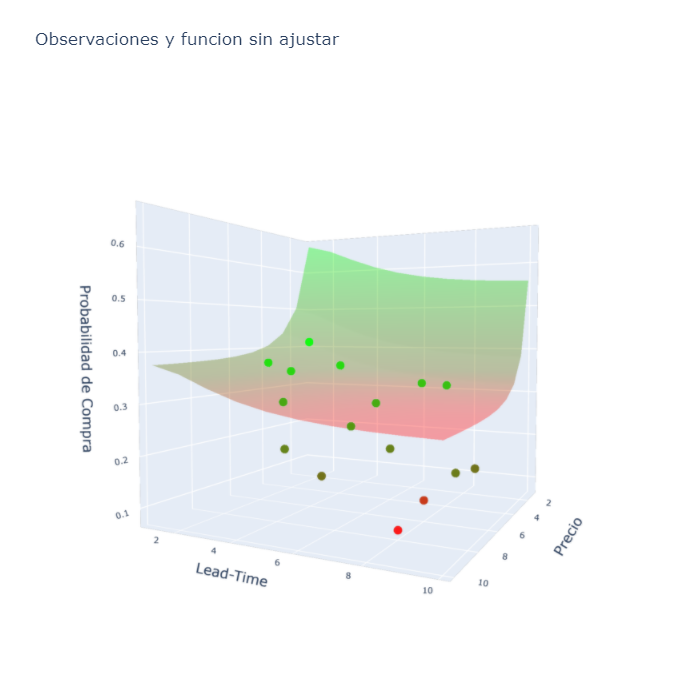

In [7]:
f_reg = lambda x,y : f(x, y, -1,5,2,1,3)
surf_3d(f_reg, (10,10), obss, titulo = "Observaciones y funcion sin ajustar", interactiva = False)

In [8]:
def SSE(args):
    sse = 0
    for obs in obss:
        sse = sse + (obs[2] - f(obs[0],obs[1],args[0],args[1],args[2],args[3],args[4]))**2 
    return(sse)

In [9]:
x = [2,5,2,1,3]
res = optimize.minimize(SSE,x)
res.x

array([-2.23665329,  4.78586979,  4.46862237,  3.08931082,  3.69723244])

In [12]:
f_reg = lambda x,y : f(x, y, res.x[0],res.x[1],res.x[2],res.x[3],res.x[4])
surf_3d(f_reg, (10,10), obss, titulo = "Observaciones y funcion ajustada", interactiva = True)